In [14]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(os.path.join('../..', 'config')))

from config.plt_config import load_config

%matplotlib inline
load_config("../../config/matplotlib_config.yaml")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
genes = ['gene' + str(i) for i in range(1, 101)]

wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)
for gene in data.index:
    data.loc[gene, 'wt1': 'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1': 'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4   ko5
gene1  370  343  362  374  325  663  671  681  706   696
gene2  577  584  562  583  553  742  711  707  752   741
gene3  591  594  601  616  588  174  174  181  160   172
gene4  444  411  434  421  463   95   95  101   97    81
gene5  468  477  450  419  436  956  958  913  977  1014
(100, 10)


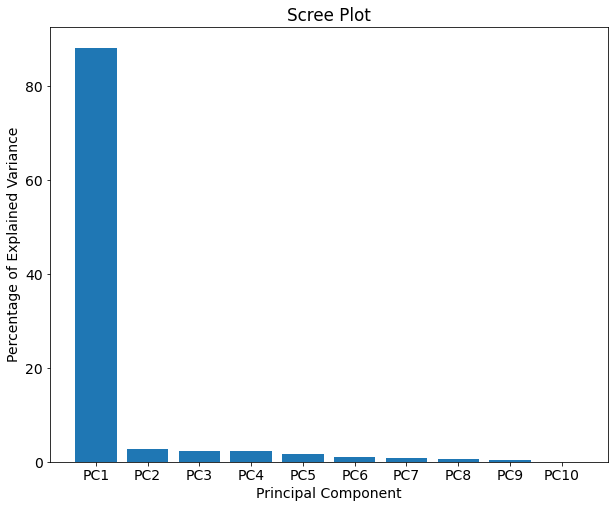

In [16]:
scaled_data = preprocessing.scale(data.T)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

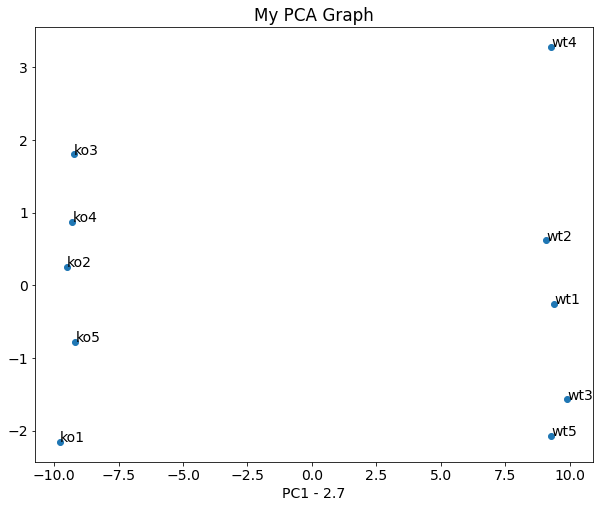

In [17]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel(f'PC1 - {per_var[0]}')
plt.xlabel(f'PC1 - {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()